<a href="https://colab.research.google.com/github/dayaiit/Machine-Learning/blob/main/L13_Interactive_Visualization_of_Gradients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-031c628bcb76>:162: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.25, 1, 1])


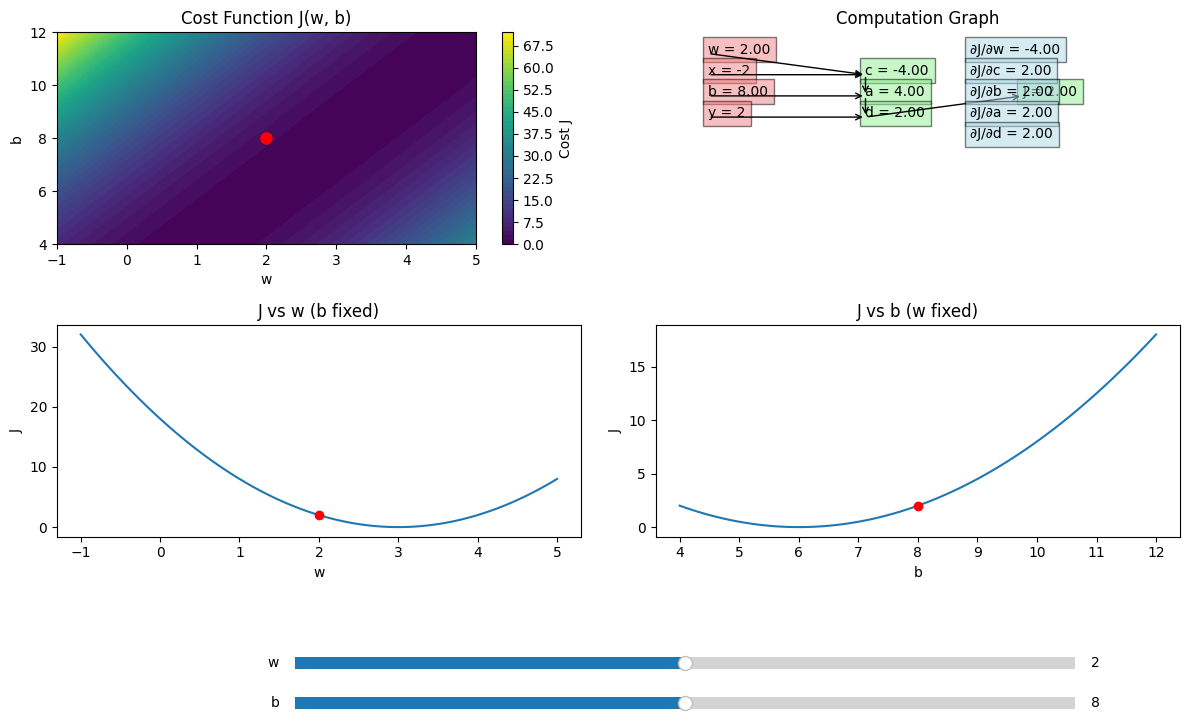

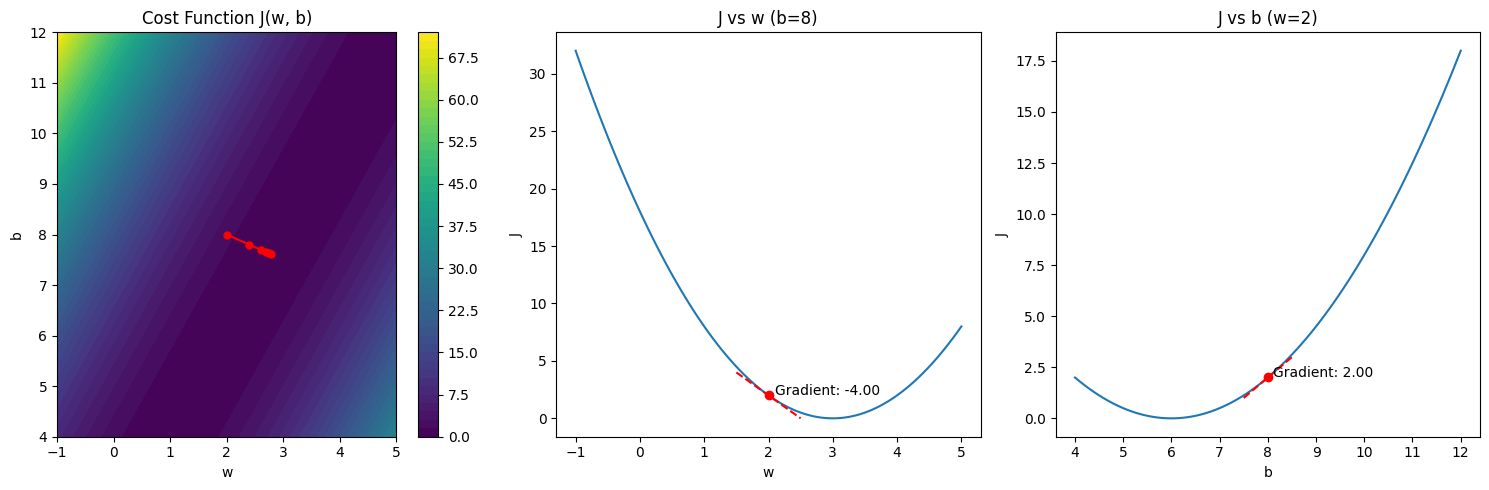

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Define our neural network and cost function
def calculate_cost(w, b, x=-2, y=2):
    # Forward pass
    c = w * x
    a = c + b
    d = a - y
    j = 0.5 * d**2

    # Return all computed values
    return {
        'c': c,
        'a': a,
        'd': d,
        'j': j
    }

# Calculate derivatives
def calculate_gradients(w, b, x=-2, y=2):
    # Forward pass values
    values = calculate_cost(w, b, x, y)

    # Backward pass (calculating derivatives)
    dj_dd = values['d']
    dj_da = dj_dd * 1  # d affects a with a factor of 1
    dj_dc = dj_da * 1  # a affects c with a factor of 1
    dj_db = dj_da * 1  # a affects b with a factor of 1
    dj_dw = dj_dc * x  # c = w * x, so dc/dw = x

    return {
        'dj_dd': dj_dd,
        'dj_da': dj_da,
        'dj_dc': dj_dc,
        'dj_db': dj_db,
        'dj_dw': dj_dw
    }

# Setup the plot
plt.figure(figsize=(12, 8))

# Set initial values
initial_w = 2
initial_b = 8

# Create a meshgrid of w and b values
w_values = np.linspace(-1, 5, 100)
b_values = np.linspace(4, 12, 100)
W, B = np.meshgrid(w_values, b_values)

# Calculate J for all combinations of w and b
J = np.zeros_like(W)
for i in range(len(w_values)):
    for j in range(len(b_values)):
        J[j, i] = calculate_cost(w_values[i], b_values[j])['j']

# Plot the cost function as a contour plot
ax1 = plt.subplot(2, 2, 1)
contour = plt.contourf(W, B, J, 50, cmap='viridis')
plt.colorbar(contour, label='Cost J')
plt.xlabel('w')
plt.ylabel('b')
plt.title('Cost Function J(w, b)')

# Mark the initial position
point, = plt.plot(initial_w, initial_b, 'ro', markersize=8)

# Calculate initial gradients
initial_values = calculate_cost(initial_w, initial_b)
initial_grads = calculate_gradients(initial_w, initial_b)

# Plot the computation graph
ax2 = plt.subplot(2, 2, 2)
plt.axis('off')
plt.title('Computation Graph')

# Function to update the computation graph
def update_graph(w, b):
    ax2.clear()
    ax2.axis('off')
    ax2.set_title('Computation Graph')

    values = calculate_cost(w, b)
    grads = calculate_gradients(w, b)

    # Draw nodes
    ax2.text(0.1, 0.9, f"w = {w:.2f}", fontsize=10, bbox=dict(facecolor='lightcoral', alpha=0.5))
    ax2.text(0.1, 0.8, f"x = -2", fontsize=10, bbox=dict(facecolor='lightcoral', alpha=0.5))
    ax2.text(0.1, 0.7, f"b = {b:.2f}", fontsize=10, bbox=dict(facecolor='lightcoral', alpha=0.5))
    ax2.text(0.1, 0.6, f"y = 2", fontsize=10, bbox=dict(facecolor='lightcoral', alpha=0.5))

    ax2.text(0.4, 0.8, f"c = {values['c']:.2f}", fontsize=10, bbox=dict(facecolor='lightgreen', alpha=0.5))
    ax2.text(0.4, 0.7, f"a = {values['a']:.2f}", fontsize=10, bbox=dict(facecolor='lightgreen', alpha=0.5))
    ax2.text(0.4, 0.6, f"d = {values['d']:.2f}", fontsize=10, bbox=dict(facecolor='lightgreen', alpha=0.5))
    ax2.text(0.7, 0.7, f"J = {values['j']:.2f}", fontsize=10, bbox=dict(facecolor='lightgreen', alpha=0.5))

    # Draw arrows for forward pass
    ax2.annotate("", xy=(0.4, 0.8), xytext=(0.1, 0.9), arrowprops=dict(arrowstyle="->"))
    ax2.annotate("", xy=(0.4, 0.8), xytext=(0.1, 0.8), arrowprops=dict(arrowstyle="->"))
    ax2.annotate("", xy=(0.4, 0.7), xytext=(0.4, 0.8), arrowprops=dict(arrowstyle="->"))
    ax2.annotate("", xy=(0.4, 0.7), xytext=(0.1, 0.7), arrowprops=dict(arrowstyle="->"))
    ax2.annotate("", xy=(0.4, 0.6), xytext=(0.4, 0.7), arrowprops=dict(arrowstyle="->"))
    ax2.annotate("", xy=(0.4, 0.6), xytext=(0.1, 0.6), arrowprops=dict(arrowstyle="->"))
    ax2.annotate("", xy=(0.7, 0.7), xytext=(0.4, 0.6), arrowprops=dict(arrowstyle="->"))

    # Add gradient information (backprop)
    ax2.text(0.6, 0.9, f"∂J/∂w = {grads['dj_dw']:.2f}", fontsize=10, bbox=dict(facecolor='lightblue', alpha=0.5))
    ax2.text(0.6, 0.8, f"∂J/∂c = {grads['dj_dc']:.2f}", fontsize=10, bbox=dict(facecolor='lightblue', alpha=0.5))
    ax2.text(0.6, 0.7, f"∂J/∂b = {grads['dj_db']:.2f}", fontsize=10, bbox=dict(facecolor='lightblue', alpha=0.5))
    ax2.text(0.6, 0.6, f"∂J/∂a = {grads['dj_da']:.2f}", fontsize=10, bbox=dict(facecolor='lightblue', alpha=0.5))
    ax2.text(0.6, 0.5, f"∂J/∂d = {grads['dj_dd']:.2f}", fontsize=10, bbox=dict(facecolor='lightblue', alpha=0.5))

# Plot the gradient vectors
ax3 = plt.subplot(2, 2, 3)
plt.plot(w_values, [calculate_cost(w, initial_b)['j'] for w in w_values])
plt.xlabel('w')
plt.ylabel('J')
plt.title('J vs w (b fixed)')
w_point, = plt.plot(initial_w, calculate_cost(initial_w, initial_b)['j'], 'ro')

ax4 = plt.subplot(2, 2, 4)
plt.plot(b_values, [calculate_cost(initial_w, b)['j'] for b in b_values])
plt.xlabel('b')
plt.ylabel('J')
plt.title('J vs b (w fixed)')
b_point, = plt.plot(initial_b, calculate_cost(initial_w, initial_b)['j'], 'ro')

# Add sliders for w and b
plt.subplots_adjust(bottom=0.25)
ax_w = plt.axes([0.25, 0.15, 0.65, 0.03])
ax_b = plt.axes([0.25, 0.1, 0.65, 0.03])

s_w = Slider(ax_w, 'w', -1, 5, valinit=initial_w)
s_b = Slider(ax_b, 'b', 4, 12, valinit=initial_b)

# Update function for sliders
def update(val):
    w = s_w.val
    b = s_b.val

    # Update the main plot point
    point.set_data(w, b)

    # Update gradient plots
    w_point.set_data(w, calculate_cost(w, b)['j'])
    b_point.set_data(b, calculate_cost(w, b)['j'])

    # Update the computation graph
    update_graph(w, b)

    plt.draw()

# Initial update
update_graph(initial_w, initial_b)

# Connect the sliders to the update function
s_w.on_changed(update)
s_b.on_changed(update)

plt.tight_layout(rect=[0, 0.25, 1, 1])
plt.show()

# For a static version that will run anywhere (without interactive widgets)
# Let's create a simplified visualization showing the effect of changing w

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Cost function contour
contour = axs[0].contourf(W, B, J, 50, cmap='viridis')
plt.colorbar(contour, ax=axs[0])
axs[0].set_xlabel('w')
axs[0].set_ylabel('b')
axs[0].set_title('Cost Function J(w, b)')

# Mark multiple points showing gradient descent
w_current, b_current = 2, 8
learning_rate = 0.1
points = [(w_current, b_current)]

for _ in range(5):
    grads = calculate_gradients(w_current, b_current)
    w_current -= learning_rate * grads['dj_dw']
    b_current -= learning_rate * grads['dj_db']
    points.append((w_current, b_current))

# Plot the path
w_path, b_path = zip(*points)
axs[0].plot(w_path, b_path, 'r-o', markersize=5)

# Plot 2: J vs w (b fixed)
axs[1].plot(w_values, [calculate_cost(w, 8)['j'] for w in w_values])
axs[1].set_xlabel('w')
axs[1].set_ylabel('J')
axs[1].set_title('J vs w (b=8)')

# Mark the gradient at w=2
w_test = 2
cost_at_w = calculate_cost(w_test, 8)['j']
grad_at_w = calculate_gradients(w_test, 8)['dj_dw']

axs[1].plot(w_test, cost_at_w, 'ro')
# Draw a tangent line
x_tangent = np.array([w_test - 0.5, w_test + 0.5])
y_tangent = cost_at_w + grad_at_w * (x_tangent - w_test)
axs[1].plot(x_tangent, y_tangent, 'r--')
axs[1].text(w_test + 0.1, cost_at_w, f'Gradient: {grad_at_w:.2f}', fontsize=10)

# Plot 3: J vs b (w fixed)
axs[2].plot(b_values, [calculate_cost(2, b)['j'] for b in b_values])
axs[2].set_xlabel('b')
axs[2].set_ylabel('J')
axs[2].set_title('J vs b (w=2)')

# Mark the gradient at b=8
b_test = 8
cost_at_b = calculate_cost(2, b_test)['j']
grad_at_b = calculate_gradients(2, b_test)['dj_db']

axs[2].plot(b_test, cost_at_b, 'ro')
# Draw a tangent line
x_tangent = np.array([b_test - 0.5, b_test + 0.5])
y_tangent = cost_at_b + grad_at_b * (x_tangent - b_test)
axs[2].plot(x_tangent, y_tangent, 'r--')
axs[2].text(b_test + 0.1, cost_at_b, f'Gradient: {grad_at_b:.2f}', fontsize=10)

plt.tight_layout()
plt.savefig('gradient_visualization.png')
plt.show()